# Inter/intra observer variations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

In [3]:
root = r'C:\Users\johamuel\Documents\BiAPoL\Shared\BiAPoLprojects\64_radiographic_workflow\Registration_user_study'

In [4]:
animals = os.listdir(root)
animals

['P1_H_B6_M52',
 'P1_H_B6_M57',
 'P1_H_B6_M61',
 'P1_H_C3H_M46',
 'P1_H_C3H_M48',
 'P1_H_C3H_M54',
 'P1_H_C3H_M58',
 'P2E_M11',
 'P2E_M14',
 'P2E_M2']

Let's write a function that helps us to parse the report file

In [58]:
def get_info(report_file: str):
    
    px_size_rg = 0.05
    px_size_xr = 0.1
    
    info = {}
    with open(report_file, 'rt') as file:
        for line in file:
            if 'Isocenter coordinates' in line:
                vals = re.findall(r'\d+\.\d+', line)
                info['isocenter_coords_x'] = float(vals[0]) * px_size_rg
                info['isocenter_coords_y'] = float(vals[1]) * px_size_rg
                
            if 'Target coordinates (radiography)' in line:
                vals = re.findall(r'\d+', line)
                info['target_coords_rg_x'] = float(vals[0]) * px_size_rg
                info['target_coords_rg_y'] = float(vals[1]) * px_size_rg
                
            if 'Target coordinates (plan)' in line:
                vals = re.findall(r'\d+', line)
                info['target_coords_xr_x'] = float(vals[0]) * px_size_xr
                info['target_coords_xr_y'] = float(vals[1]) * px_size_xr
                
            if 'Transformation parameters' in line:
                _line = line.split(':')[-1]
                val1 = re.findall(r'\d+\.\d+', _line)
                val2 = re.findall(r'\d+', ' '.join(_line.split(',')[-2:]))
                vals = val1 + val2
                info['trafo_r'] = float(vals[0])
                info['trafo_angle'] = float(vals[1])
                info['trafo_x'] = float(vals[1]) * px_size_rg
                info['trafo_y'] = float(vals[2]) * px_size_rg
                
            if 'Motor origin' in line:
                vals = re.findall(r'\d+\.\d+', line)
                info['motor_origin_x'] = float(vals[0])
                info['motor_origin_y'] = float(vals[1])
                
            if 'Motor destination' in line:
                vals = re.findall(r'\d+\.\d+', line)
                info['motor_dest_x'] = float(vals[0])
                info['motor_dest_y'] = float(vals[1])            
               
    return info

In [59]:
results = []
for animal in animals:
    _results = []
    for study in os.listdir(os.path.join(root, animal)):
        observer = study.split('_')[1]
        
        
        report_file = os.path.join(root, animal, study, 'report.txt')
        info = get_info(report_file)
        
        data_columns = list(info.keys())

        info['observer'] = observer
        info['animal'] = animal
        
        _results.append(info)
    _df = pd.DataFrame(_results)
    _df[data_columns] = _df[data_columns] - _df[data_columns].mean()
    results.append(_df)
df = pd.concat(results)

These are the accumulated, anonymized results:

In [60]:
df['observer'] = 'Observer ' + pd.Series(pd.factorize(df['observer'])[0] + 1).astype(str)
df

,isocenter_coords_x,isocenter_coords_y,target_coords_xr_x,target_coords_xr_y,target_coords_rg_x,target_coords_rg_y,trafo_r,trafo_angle,trafo_x,trafo_y,motor_origin_x,motor_origin_y,motor_dest_x,motor_dest_y,observer,animal
0,-0.003000,-0.001000,-0.380000,-0.120000,-1.000000e-01,-2.200000e-01,-0.008000,-1.680000,-0.084000,-0.760000,0.000000,0.000000,0.086000,0.206000,Observer 1,P1_H_B6_M52
1,0.002000,-0.001000,0.120000,0.080000,-2.000000e-01,-1.700000e-01,0.012000,2.120000,0.106000,1.090000,0.000000,0.000000,0.206000,0.156000,Observer 2,P1_H_B6_M52
2,0.002000,-0.001000,0.120000,0.080000,-3.552714e-15,3.800000e-01,-0.018000,0.320000,0.016000,0.140000,0.000000,0.000000,0.036000,-0.374000,Observer 2,P1_H_B6_M52
3,0.002000,-0.001000,0.120000,-0.020000,2.000000e-01,1.800000e-01,0.002000,-1.180000,-0.059000,-0.760000,0.000000,0.000000,-0.214000,-0.154000,Observer 2,P1_H_B6_M52
4,-0.003000,0.004000,0.020000,-0.020000,1.000000e-01,-1.700000e-01,0.012000,0.420000,0.021000,0.290000,0.000000,0.000000,-0.114000,0.166000,Observer 3,P1_H_B6_M52
0,0.001000,0.000000,-0.140000,-0.280000,-3.300000e-01,-2.800000e-01,0.114000,2.140000,0.107000,-2.680000,0.000000,0.000000,0.338000,0.290000,Observer 1,P1_H_B6_M57
1,0.001000,0.000000,0.160000,-0.080000,2.200000e-01,-3.000000e-02,0.014000,0.340000,0.017000,-0.830000,0.000000,0.000000,-0.212000,0.010000,Observer 2,P1_H_B6_M57
2,0.001000,0.000000,-0.040000,0.120000,-1.300000e-01,1.200000e-01,0.014000,-1.560000,-0.078000,0.320000,0.000000,0.000000,0.138000,-0.110000,Observer 2,P1_H_B6_M57
3,-0.004000,0.000000,-0.140000,0.020000,-1.300000e-01,-8.000000e-02,-0.026000,0.140000,0.007000,1.720000,0.000000,0.000000,0.108000,0.080000,Observer 2,P1_H_B6_M57
4,0.001000,0.000000,0.160000,0.220000,3.700000e-01,2.700000e-01,-0.116000,-1.060000,-0.053000,1.470000,0.000000,0.000000,-0.372000,-0.270000,Observer 3,P1_H_B6_M57


In [80]:
# Some code to make the plots below look nicer

units = {x: '[mm]' for x in df.columns if 'x' in x or 'y' in x}
units['trafo_r'] = '[a.u.]'
units['trafo_angle'] = '[°]'

labels = {}
labels['isocenter_coords_x'] = 'Isocenter coordinates$_{RG, x}$'
labels['isocenter_coords_y'] = 'Isocenter coordinates$_{RG, y}$'

labels['trafo_r'] = 'Transformation: scale '
labels['trafo_angle'] = 'Transformation: angle '
labels['trafo_x'] = 'Transformation: dx'
labels['trafo_y'] = 'Transformation: dy'

labels['target_coords_xr_x'] = 'Target coordinates$_{XR, x}$'
labels['target_coords_xr_y'] = 'Target coordinates$_{XR, y}$'

labels['target_coords_rg_x'] = 'Target coordinates$_{RG, x}$'
labels['target_coords_rg_y'] = 'Target coordinates$_{RG, y}$'

labels['motor_dest_x'] = 'Target coordinates$_{Motor, x}$'
labels['motor_dest_y'] = 'Target coordinates$_{Motor, y}$'

yrange = {x: (-2.5, 2.5) for x in df.columns if 'x' in x or 'y' in x}
yrange['trafo_r'] = (-0.15, 0.15)
yrange['trafo_angle'] = (-5, 5)
yrange['motor_dest_x'] = (-5, 5)
yrange['motor_dest_y'] = (-5, 5)


In order to better compare large/small deviations between animals, we normalize all measurement values to their common mean:

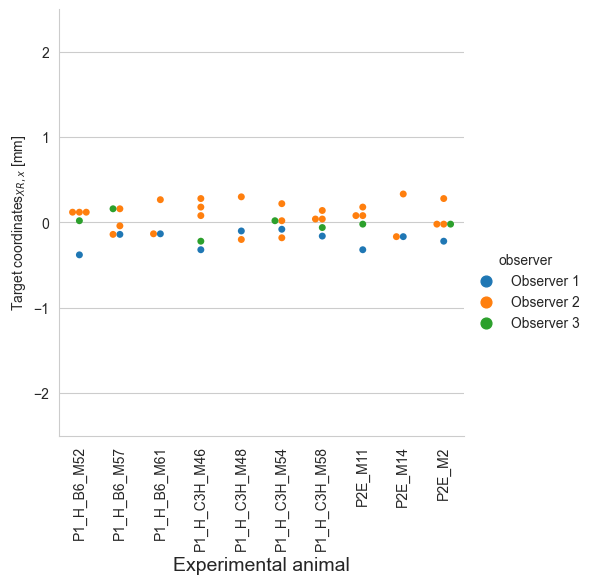

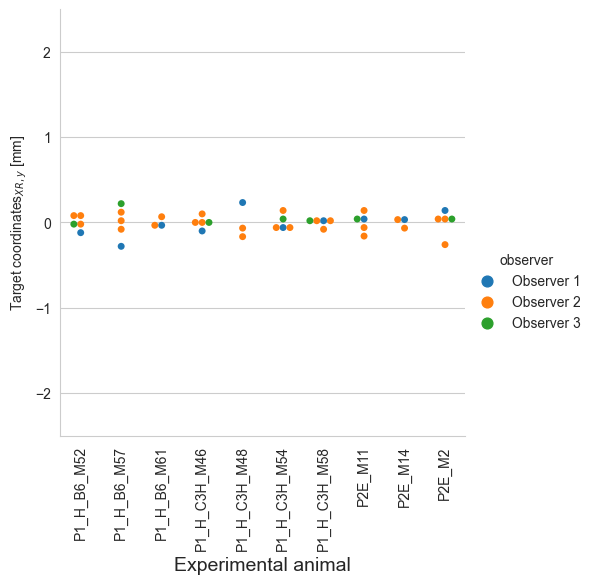

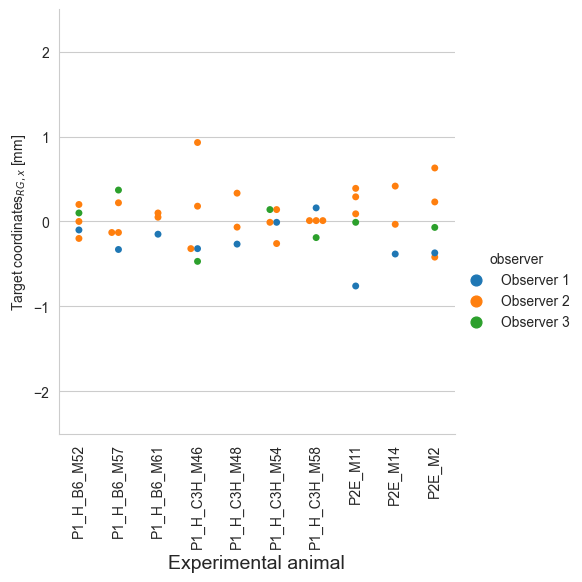

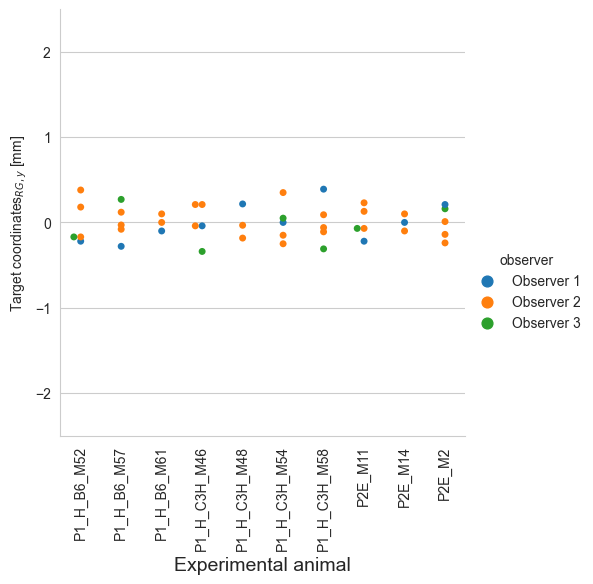

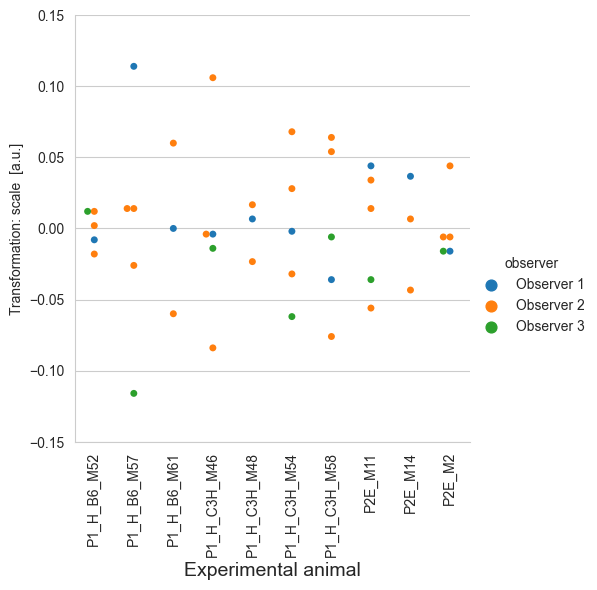

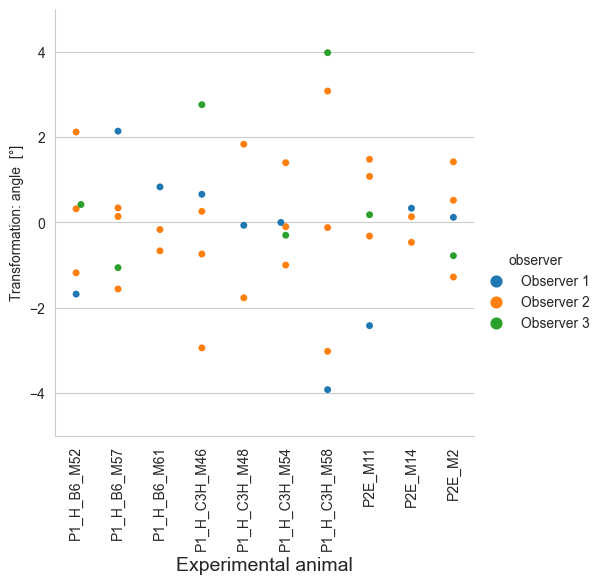

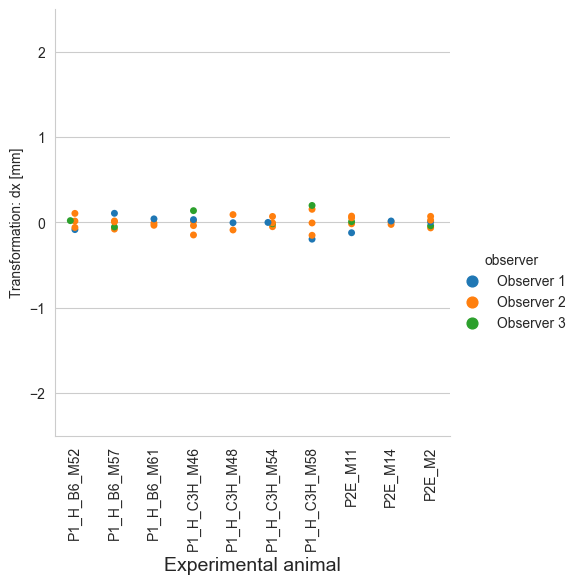

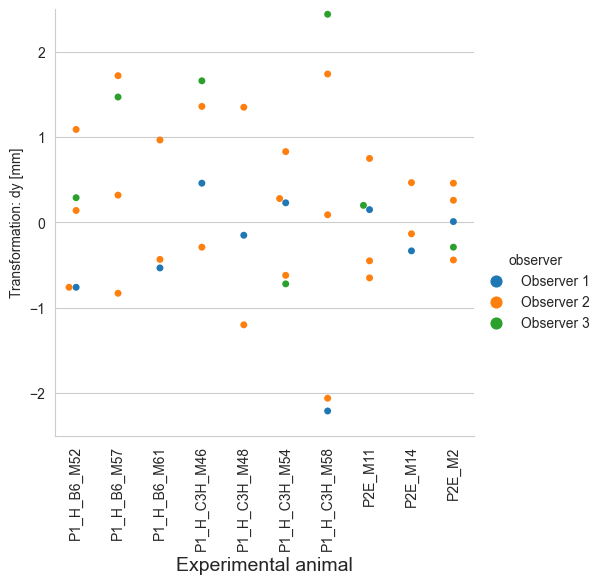

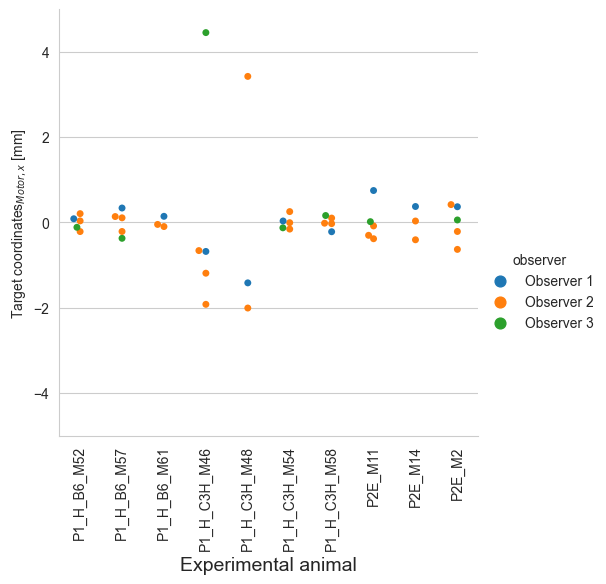

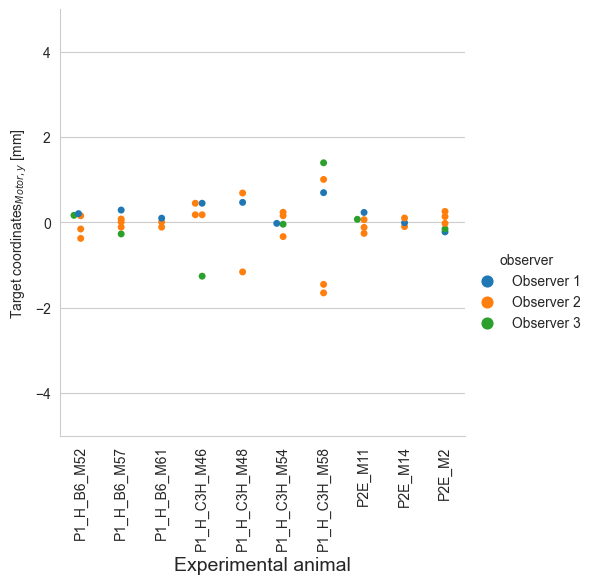

In [84]:
measurement_items = list(df.columns)
measurement_items.remove('animal')
measurement_items.remove('observer')
measurement_items.remove('motor_origin_x')
measurement_items.remove('motor_origin_y')
measurement_items.remove('isocenter_coords_x')
measurement_items.remove('isocenter_coords_y')

sns.set_style("whitegrid")

for key in measurement_items:
    g = sns.catplot(data=df, x='animal', y=key, hue='observer', kind='swarm')
    g.set_xticklabels(rotation=90)
    #g.set_ylabels('transformation angle [°]', fontsize=14)
    g.set_xlabels('Experimental animal', fontsize=14)
    g.set_ylabels(labels[key] + ' ' + units[key])
    g.set(ylim=yrange[key])